# Unsupervised Learning

In [2]:
%matplotlib inline
## Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_color_codes()



In [3]:
cars_df = pd.read_csv('vehicle.csv')
cars_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
cars_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [5]:
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
cars_df.describe(include='all').transpose()

count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   
scaled_radius_of_gyration     844    NaN  NaN  NaN   174.71  32.5848  109   
scaled_radius_of_gyration.1   842    NaN  NaN  NaN  72.4477  7.48619   59   
skewness_about                840    NaN  NaN  NaN  6.36429  4.92065    0   
skewness_about.1              845    NaN  NaN  NaN  12.6024  8.93608    0   
skewness_about.2              845    NaN  NaN  NaN   188.92  6.15581  176   
hollows_ratio                 846    NaN  NaN  NaN  195.632   7.4388  181   
class                         846      3  car  429      NaN      NaN  NaN   

                                25%    50%  75%   max  
compactness                      87     93  100   119  
circularity                      40     44   49    59  
distance_circularity             70     80   98   112  
radius_ratio                    141    167  195   333  
pr.axis_aspect_ratio             57     61   65   138  
max.length_aspect_ratio           7      8   10    55  
scatter_ratio                   147    157  198   265  
elongatedness                    33     43   46    61  
pr.axis_rectangularity           19     20   23    29  
max.length_rectangularity       137    146  159   188  
scaled_variance                 167    179  217   320  
scaled_variance.1               318  363.5  587  1018  
scaled_radius_of_gyration       149  173.5  198   268  
scaled_radius_of_gyration.1      67   71.5   75   135  
skewness_about                    2      6    9    22  
skewness_about.1                  5     11   19    41  
skewness_about.2                184    188  193   206  
hollows_ratio                190.25    197  201   211  
class                           NaN    NaN  NaN   NaN

In [7]:
cars_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

 ### Find missing values

In [8]:
cars_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Since above technique did not show missing values we will loop through individual column

### Treat missing values

In [10]:
cars_df = cars_df.fillna(cars_df.mean())

In [11]:
cars_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## Univariant Analysis

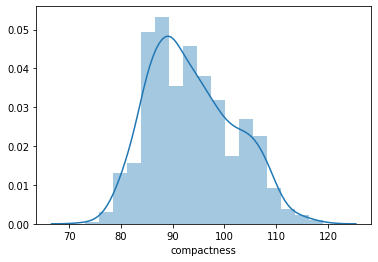

In [12]:
sns.distplot(cars_df['compactness'])

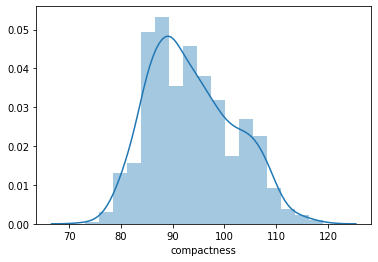

In [13]:
sns.distplot(cars_df['compactness'])


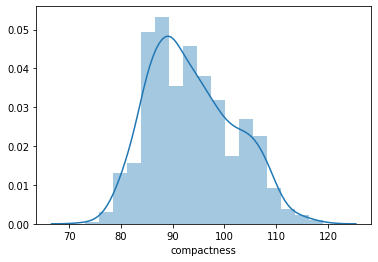

In [14]:
sns.distplot(cars_df['compactness'])

## Bivariant Analysis

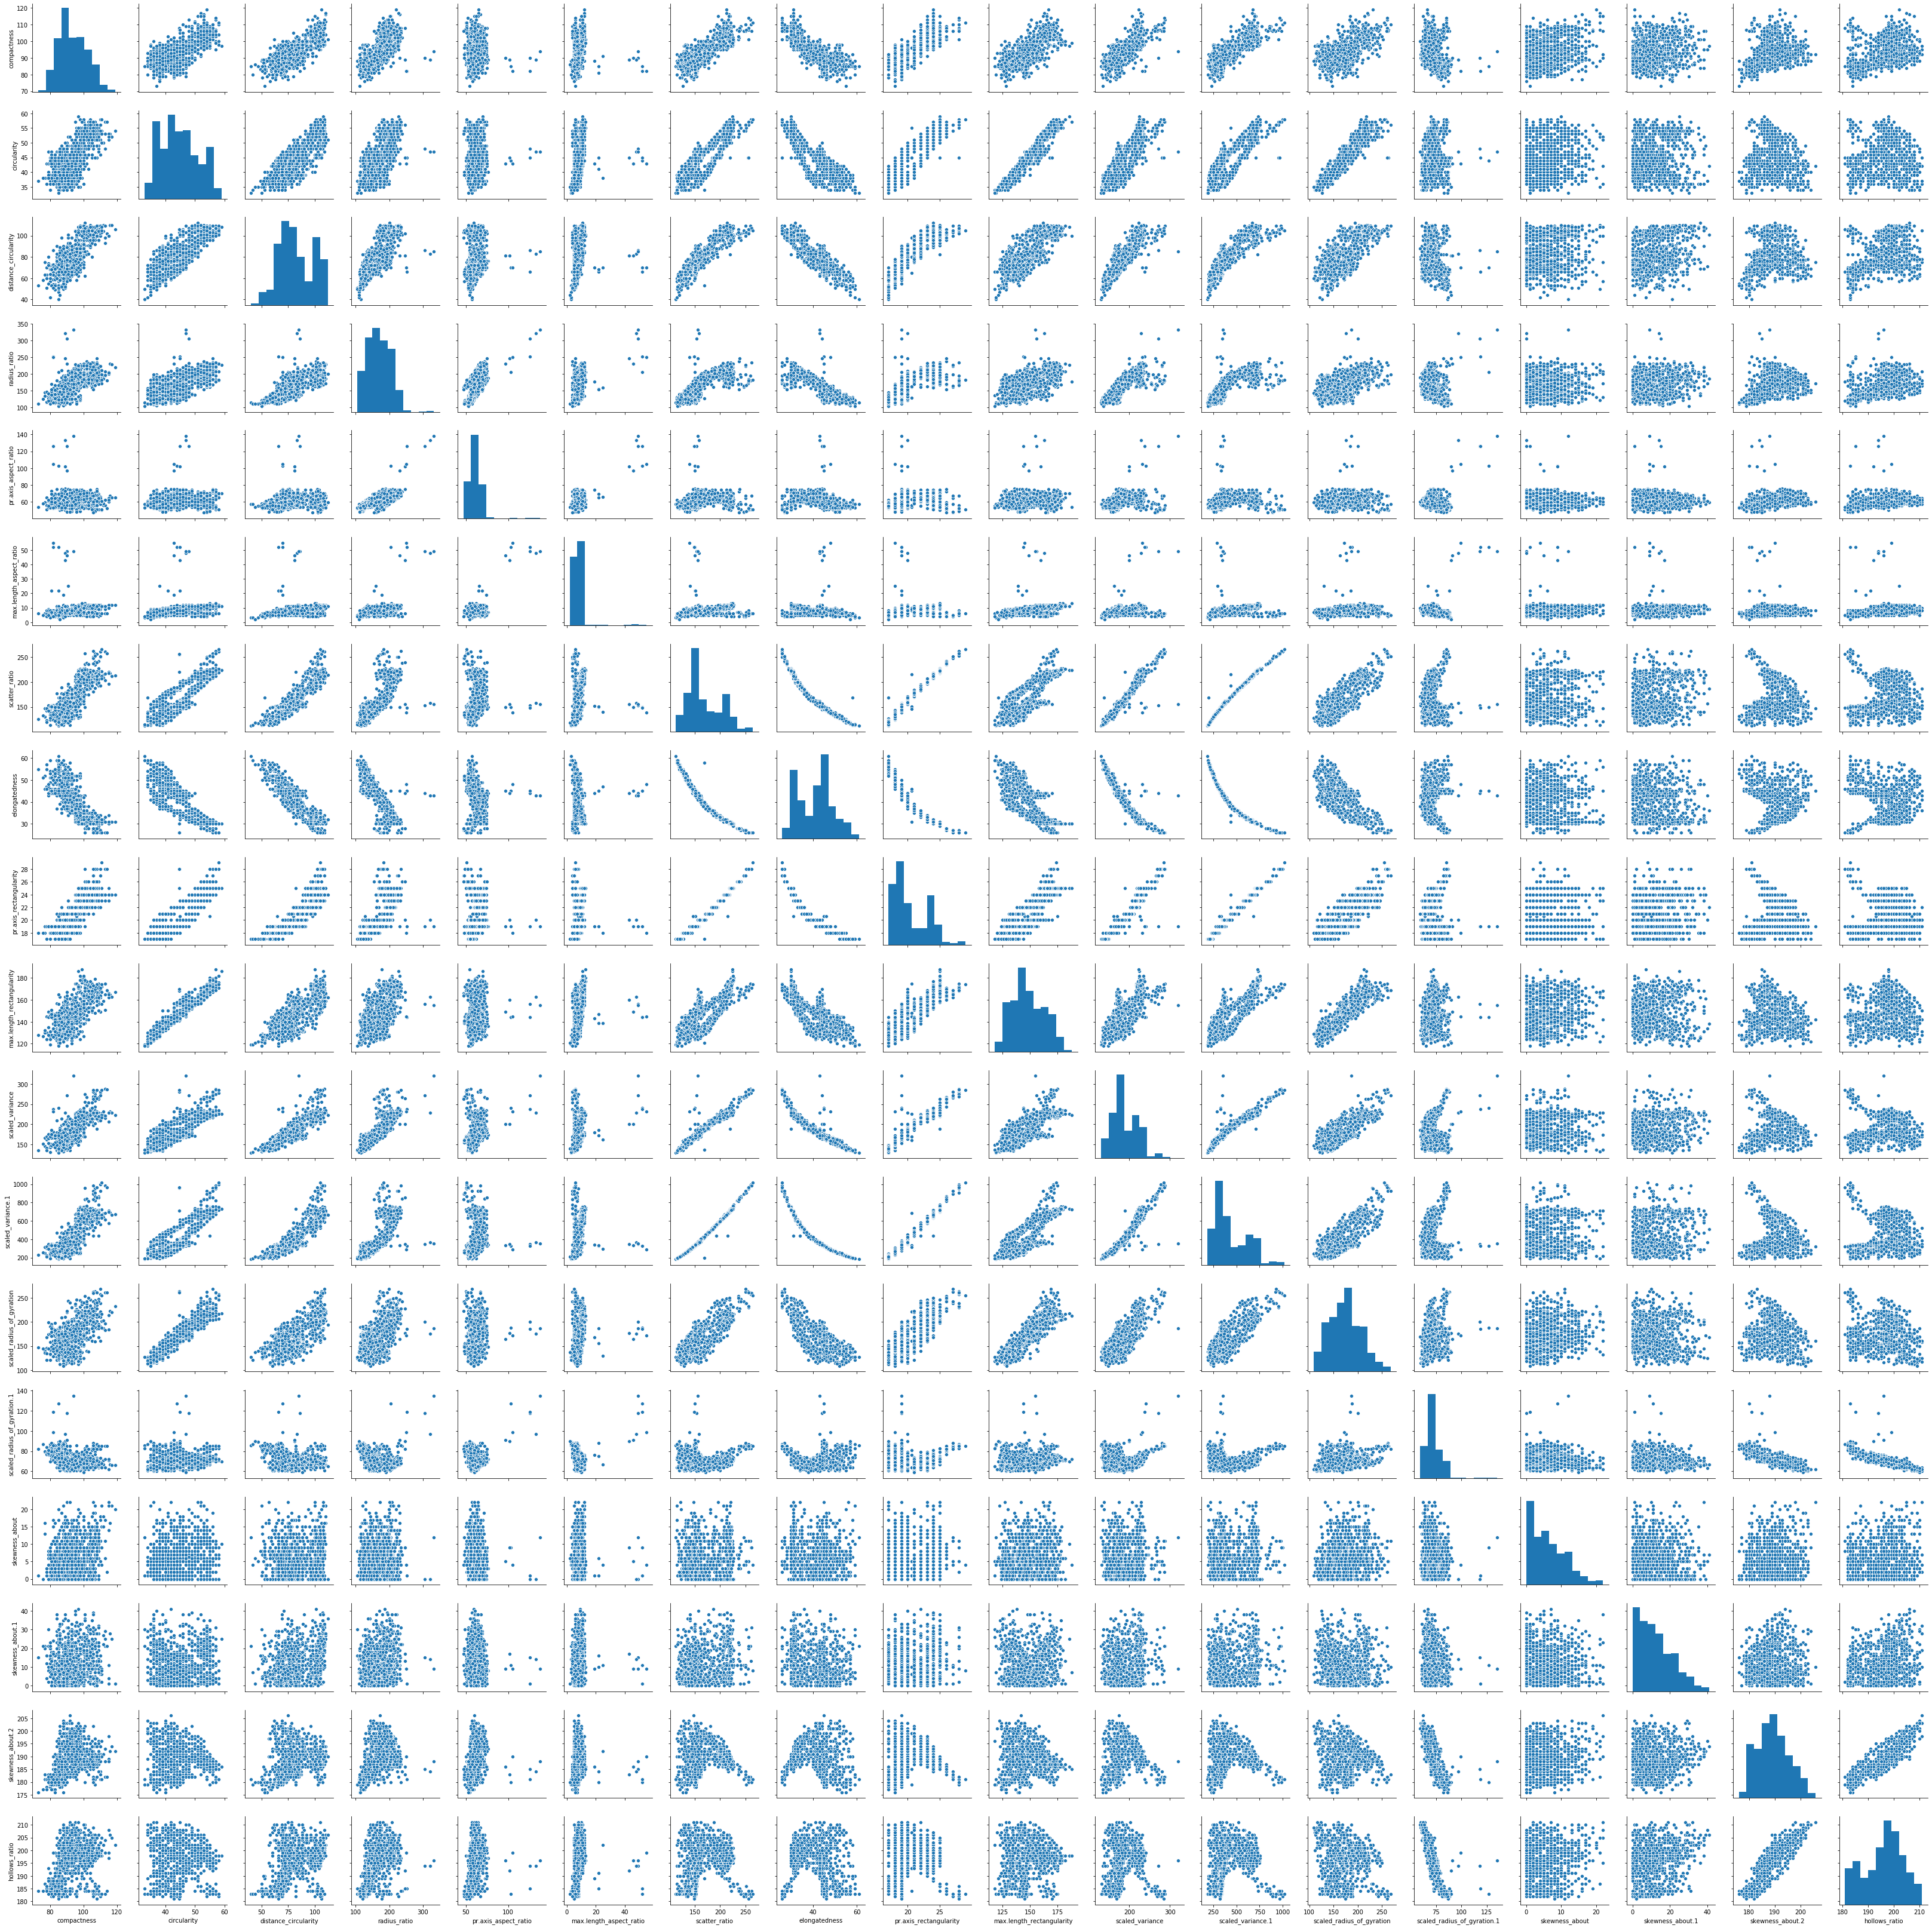

In [15]:
sns.pairplot(cars_df)

In [16]:
cars_df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr.axis_aspect_ratio            0.091704     0.153362              0.158397   
max.length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance.1               0.815901     0.838525              0.887328   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about.1                0.157387    -0.011851              0.265553   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr.axis_aspect_ratio             0.663559              1.000000   
max.length_aspect_ratio          0.450036              0.648704   
scatter_ratio                    0.734228              0.103715   
elongatedness                   -0.789795             -0.183264   
pr.axis_rectangularity           0.708285              0.079395   
max.length_rectangularity        0.569205              0.127128   
scaled_variance                  0.794041              0.273414   
scaled_variance.1                0.720150              0.089620   
scaled_radius_of_gyration        0.536536              0.122111   
scaled_radius_of_gyration.1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about.1                 0.173832             -0.032134   
skewness_about.2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450036       0.734228   
pr.axis_aspect_ratio                        0.648704       0.103715   
max.length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr.axis_rectangularity                      0.161592       0.989370   
max.length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318955       0.948296   
scaled_variance.1                           0.143713       0.993784   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration.1                 0.295574      -0.027985   
skewness_about                              0.015439       0.074308   
skewness_about.1                            0.043489       0.213127   
skewness_about.2                           -0.

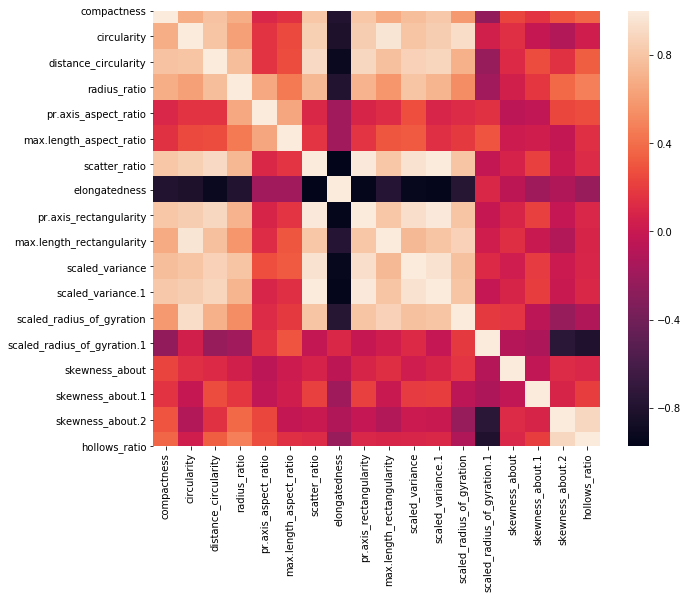

In [17]:
plt.subplots(figsize=(10,8))
sns.heatmap(cars_df.corr())

### Find outliers

In [18]:
from itertools import chain

numeric_cols = cars_df.select_dtypes(include=['float64', 'int64']).columns

outlier_rec = []
# For each predictors find outliers using mathematical function.
def find_outlier(df_in, col_name, verbose=False):
    q25 = df_in[col_name].quantile(0.25)
    q75 = df_in[col_name].quantile(0.75)
    iqr = q75-q25 #Interquartile range
    lower, upper  = q25-1.5*iqr, q75+1.5*iqr
    outliers_df = df_in[(df_in[col_name] < lower) | (df_in[col_name] > upper)]
    outliers_removed_df = df_in[(df_in[col_name] >= lower) & (df_in[col_name] <= upper)]
    
    if(verbose):
        print('# Number of outliers / non-outliers for column \'{}\': {} /{}'.format(
            col_name, outliers_df.shape[0], outliers_removed_df.shape[0]))
    return outliers_df.index.tolist();

for feature in numeric_cols:
    outlier_rec.append(find_outlier(cars_df, feature, True))
    
outlier_rec = list(chain.from_iterable(outlier_rec))
outlier_rec = list(set(outlier_rec)) 
outlier_rec.sort()
print('# Total outliers in the dataset: {}'.format(len(outlier_rec)))
print(outlier_rec)

# Number of outliers / non-outliers for column 'compactness': 0 /846
# Number of outliers / non-outliers for column 'circularity': 0 /846
# Number of outliers / non-outliers for column 'distance_circularity': 0 /846
# Number of outliers / non-outliers for column 'radius_ratio': 3 /843
# Number of outliers / non-outliers for column 'pr.axis_aspect_ratio': 8 /838
# Number of outliers / non-outliers for column 'max.length_aspect_ratio': 13 /833
# Number of outliers / non-outliers for column 'scatter_ratio': 0 /846
# Number of outliers / non-outliers for column 'elongatedness': 0 /846
# Number of outliers / non-outliers for column 'pr.axis_rectangularity': 0 /846
# Number of outliers / non-outliers for column 'max.length_rectangularity': 0 /846
# Number of outliers / non-outliers for column 'scaled_variance': 1 /845
# Number of outliers / non-outliers for column 'scaled_variance.1': 2 /844
# Number of outliers / non-outliers for column 'scaled_radius_of_gyration': 0 /846
# Number of outlie

#### Treat outliers

In [19]:
pd.crosstab(cars_df['radius_ratio'], cars_df['class'])

class         bus  car  van
radius_ratio               
104.0           0    1    0
105.0           0    0    1
109.0           0    0    1
110.0           0    1    2
111.0           0    1    3
...           ...  ...  ...
250.0           0    0    1
252.0           1    0    0
306.0           0    0    1
322.0           0    0    1
333.0           0    0    1

[135 rows x 3 columns]

In [20]:
cars_df['radius_ratio'] = np.where(cars_df['radius_ratio']>=300, 252, cars_df['radius_ratio'])

In [21]:
pd.crosstab(cars_df['radius_ratio'], cars_df['class'])

class         bus  car  van
radius_ratio               
104.0           0    1    0
105.0           0    0    1
109.0           0    0    1
110.0           0    1    2
111.0           0    1    3
...           ...  ...  ...
235.0           1    0    0
238.0           1    0    0
246.0           1    0    1
250.0           0    0    1
252.0           1    0    3

[132 rows x 3 columns]

In [22]:
pd.crosstab(cars_df['pr.axis_aspect_ratio'], cars_df['class'])

class                 bus  car  van
pr.axis_aspect_ratio               
47.00000                2    0    0
48.00000                1    0    3
49.00000                1    0    2
50.00000                3    1    1
51.00000                7    1    3
52.00000                3    2    9
53.00000                8   13    6
54.00000               12   16   10
55.00000                7   19   11
56.00000               13   28   16
57.00000                7   29    8
58.00000                4   22   17
59.00000                6   43   15
60.00000                5   33    8
61.00000                8   26    8
61.67891                1    1    0
62.00000                6   42   10
63.00000                4   28   13
64.00000               17   30   22
65.00000               13   20    5
66.00000               10   17   10
67.00000                7   16    5
68.00000               12   15    7
69.00000               13   10    2
70.00000               10    7    1
71.00000               10    5    0
72.00000                7    2    1
73.00000                6    1    0
74.00000                7    2    0
75.00000                5    0    0
76.00000                1    0    0
97.00000                0    0    1
102.00000               0    0    1
103.00000               1    0    0
105.00000               0    0    1
126.00000               1    0    1
133.00000               0    0    1
138.00000               0    0    1

In [23]:
cars_df['pr.axis_aspect_ratio'] = np.where(cars_df['pr.axis_aspect_ratio']>=76, 75, cars_df['pr.axis_aspect_ratio'])

In [24]:
pd.crosstab(cars_df['pr.axis_aspect_ratio'], cars_df['class'])

class                 bus  car  van
pr.axis_aspect_ratio               
47.00000                2    0    0
48.00000                1    0    3
49.00000                1    0    2
50.00000                3    1    1
51.00000                7    1    3
52.00000                3    2    9
53.00000                8   13    6
54.00000               12   16   10
55.00000                7   19   11
56.00000               13   28   16
57.00000                7   29    8
58.00000                4   22   17
59.00000                6   43   15
60.00000                5   33    8
61.00000                8   26    8
61.67891                1    1    0
62.00000                6   42   10
63.00000                4   28   13
64.00000               17   30   22
65.00000               13   20    5
66.00000               10   17   10
67.00000                7   16    5
68.00000               12   15    7
69.00000               13   10    2
70.00000               10    7    1
71.00000               10    5    0
72.00000                7    2    1
73.00000                6    1    0
74.00000                7    2    0
75.00000                8    0    6

In [25]:
pd.crosstab(cars_df['max.length_aspect_ratio'], cars_df['class'])

class                    bus  car  van
max.length_aspect_ratio               
2                          0    0    1
3                          0    2    2
4                          7    9    2
5                         26   15   10
6                         78   35   19
7                         80   62   26
8                         22   58   33
9                          0   60   34
10                         0   80   32
11                         0   78   30
12                         0   27    3
13                         0    3    0
19                         1    0    0
22                         2    0    0
25                         0    0    1
43                         0    0    1
46                         0    0    1
48                         0    0    1
49                         0    0    2
52                         2    0    0
55                         0    0    1

In [26]:
cars_df['max.length_aspect_ratio'] = np.where(cars_df['max.length_aspect_ratio']>=13, 12, cars_df['max.length_aspect_ratio'])

In [27]:
pd.crosstab(cars_df['max.length_aspect_ratio'], cars_df['class'])

class                    bus  car  van
max.length_aspect_ratio               
2                          0    0    1
3                          0    2    2
4                          7    9    2
5                         26   15   10
6                         78   35   19
7                         80   62   26
8                         22   58   33
9                          0   60   34
10                         0   80   32
11                         0   78   30
12                         5   30   10

In [28]:
pd.crosstab(cars_df['scaled_variance'], cars_df['class'])

class            bus  car  van
scaled_variance               
130.0              0    1    0
131.0              0    1    0
132.0              0    1    0
134.0              0    0    1
135.0              0    3    3
...              ...  ...  ...
280.0              3    0    0
285.0              3    0    0
287.0              1    0    0
288.0              1    0    0
320.0              0    0    1

[129 rows x 3 columns]

In [29]:
cars_df['scaled_variance'] = np.where(cars_df['scaled_variance']>=300, 288, cars_df['scaled_variance'])

In [30]:
pd.crosstab(cars_df['scaled_variance'], cars_df['class'])

class            bus  car  van
scaled_variance               
130.0              0    1    0
131.0              0    1    0
132.0              0    1    0
134.0              0    0    1
135.0              0    3    3
...              ...  ...  ...
278.0              1    0    0
280.0              3    0    0
285.0              3    0    0
287.0              1    0    0
288.0              1    0    1

[128 rows x 3 columns]

In [41]:
pd.crosstab(cars_df['skewness_about'], cars_df['class'])

class           bus  car  van
skewness_about               
0.000000         19   44   14
1.000000         22   38   21
2.000000         19   29   15
3.000000         17   26   13
4.000000         28   25   17
5.000000         22   35   14
6.000000         25   27   13
6.364286          4    2    0
7.000000         18   22   20
8.000000         15   19   13
9.000000         14   22   10
10.000000         6   21    9
11.000000         4   20    7
12.000000         2   18   10
13.000000         2   18    6
14.000000         0   14    4
15.000000         0   15    4
16.000000         0   10    1
17.000000         1    5    5
18.000000         0    4    2
19.000000         0    3    1
20.000000         0    3    0
21.000000         0    5    0
22.000000         0    4    0

In [31]:
cars_df['skewness_about'] = np.where(cars_df['skewness_about']>=20, 19, cars_df['skewness_about'])

In [32]:
pd.crosstab(cars_df['skewness_about'], cars_df['class'])

class           bus  car  van
skewness_about               
0.000000         19   44   14
1.000000         22   38   21
2.000000         19   29   15
3.000000         17   26   13
4.000000         28   25   17
5.000000         22   35   14
6.000000         25   27   13
6.364286          4    2    0
7.000000         18   22   20
8.000000         15   19   13
9.000000         14   22   10
10.000000         6   21    9
11.000000         4   20    7
12.000000         2   18   10
13.000000         2   18    6
14.000000         0   14    4
15.000000         0   15    4
16.000000         0   10    1
17.000000         1    5    5
18.000000         0    4    2
19.000000         0   15    1

In [33]:
pd.crosstab(cars_df['scaled_radius_of_gyration'], cars_df['class'])

class                      bus  car  van
scaled_radius_of_gyration               
109.0                        0    0    1
112.0                        0    0    3
113.0                        0    0    1
114.0                        0    1    0
115.0                        0    1    1
...                        ...  ...  ...
260.0                        1    0    0
261.0                        3    0    0
262.0                        1    0    0
264.0                        1    0    0
268.0                        1    0    0

[144 rows x 3 columns]

In [34]:
cars_df['scaled_radius_of_gyration'] = np.where(cars_df['scaled_radius_of_gyration']>=200, 210, cars_df['scaled_radius_of_gyration'])

In [35]:
pd.crosstab(cars_df['scaled_radius_of_gyration'], cars_df['class'])

class                      bus  car  van
scaled_radius_of_gyration               
109.0                        0    0    1
112.0                        0    0    3
113.0                        0    0    1
114.0                        0    1    0
115.0                        0    1    1
...                        ...  ...  ...
196.0                        0    3    0
197.0                        0    5    0
198.0                        5    4    0
199.0                        1    4    1
210.0                       42  157    3

[90 rows x 3 columns]

In [36]:
print('# Shape of dataset before removing outliers:{}'.format(cars_df.shape[0]))

## Treating ouliers. Action to take - drop the rows

# C_df.drop(C_df.index[outlier_rec], inplace=True)

print('# Shape of dataset before after outliers:{}'.format(cars_df.shape[0]))

# Shape of dataset before removing outliers:846
# Shape of dataset before after outliers:846


### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (2.5 points)


# Create correlation matrix

In [37]:
corr_matrix = cars_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1']

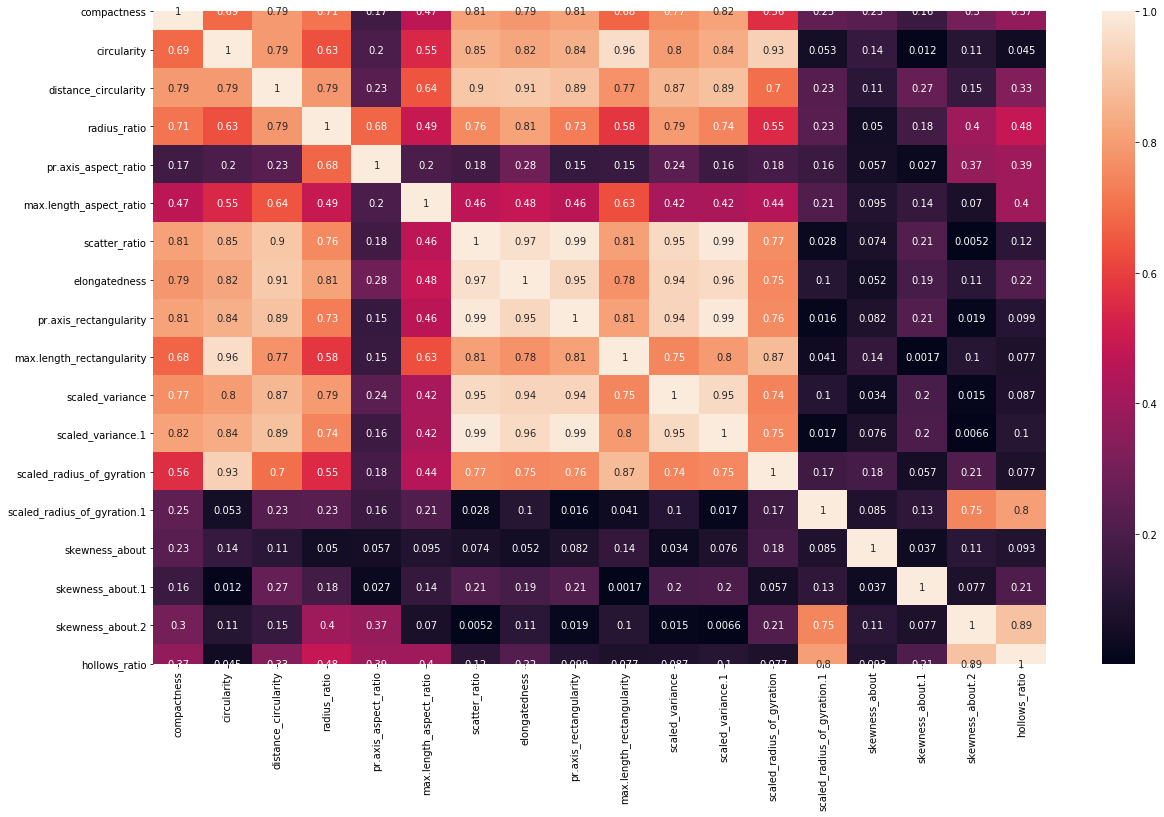

In [38]:
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot=True)

###  Following variables are highly correlated (positively) : scaled_variance, scaled_variance.1, scatter_ratio, pr.axis_rectangulaity

### Following variable are highly negatively correlated: elongatedness, compactness, circularity, distance_circularity, radius_ratio, scatter_ratio,  pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration

### The variables, skewness_about.2, hollows_ratioo and scaled_radius_of_gyration.1 are also highly negatively correlated

In [39]:
C_df = cars_df.drop(columns= ['scaled_variance.1', 'pr.axis_rectangularity', 'elongatedness', 'scaled_radius_of_gyration.1'])
C_df = cars_df.drop(columns= ['skewness_about.1', 'skewness_about.2'])

### Both Positively and Negatively highly correlated columns have been removed from the dataset

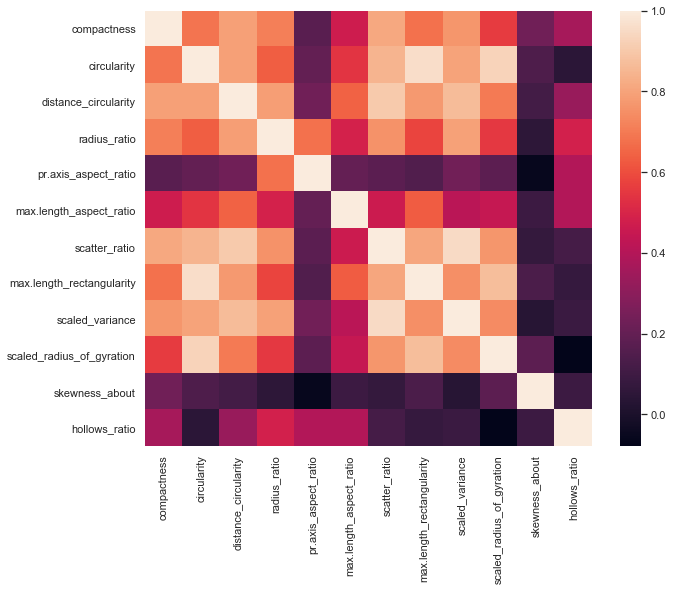

In [111]:
plt.subplots(figsize=(10,8))
sns.heatmap(C_df.corr())

### Based on the above heatmap observation, the variables look independent and not higly corelated to each other

### Standardize the dataset

In [51]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature matrix
feature_space = pd.DataFrame(C_df, columns=numeric_cols)
std_sh = StandardScaler().fit_transform(feature_space)

std_sh_df = pd.DataFrame(std_sh, columns=numeric_cols)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

predictor_variables = numeric_cols

threshold = 10
for i in np.arange(0,len(predictor_variables)):
    vif = [variance_inflation_factor(std_sh_df[predictor_variables].values, j) for j in range(std_sh_df[predictor_variables].shape[1])]
    maxindex = vif.index(max(vif))
    if max(vif) > threshold:
        #print ("VIF :", vif)
        print('Eliminating \'' + std_sh_df[predictor_variables].columns[maxindex] + '\' at index: ' + str(maxindex))
        #del predictor_variables[maxindex]
    else:
        break

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

# 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [53]:
C_df2 = C_df.drop(columns=['class'])

In [54]:
from sklearn.decomposition import PCA

# Create a PCA that will retain 95% of the variance
pca_model = PCA()

X_test_reduced = pca_model.fit_transform(std_sh_df)
X_test_reduced.shape

(846, 18)

In [55]:
pca_model.components_

array([[ 2.72308761e-01,  2.89024073e-01,  3.02855212e-01,
         2.68623407e-01,  9.65796258e-02,  1.92050990e-01,
         3.10527691e-01, -3.09338863e-01,  3.07445300e-01,
         2.79887385e-01,  2.99958622e-01,  3.06972638e-01,
         2.61250204e-01, -3.54911051e-02,  4.16706126e-02,
         5.88131335e-02,  3.62735796e-02,  8.37532247e-02],
       [-9.94800649e-02,  1.36093653e-01, -5.20608279e-02,
        -1.89802654e-01, -2.38544922e-01, -9.48733084e-02,
         6.93995827e-02, -7.04298123e-03,  8.17154327e-02,
         1.25655760e-01,  8.24221185e-02,  7.53312839e-02,
         1.97355861e-01,  4.76498631e-01, -3.95611279e-02,
        -1.05405942e-01, -5.22648962e-01, -5.24693838e-01],
       [ 8.63111676e-03, -2.05036365e-01,  8.58368551e-02,
        -1.15377120e-02, -2.18725745e-01, -1.50230539e-01,
         1.27945009e-01, -9.15976008e-02,  1.30797439e-01,
        -2.08148609e-01,  1.38000170e-01,  1.32991609e-01,
        -2.53027242e-01,  1.35750983e-02, -4.32430913e

In [56]:
e_variance = pca_model.explained_variance_
e_variance

array([9.70092866e+00, 3.13502190e+00, 1.21562454e+00, 1.19631681e+00,
       8.69959817e-01, 7.65697576e-01, 3.67190407e-01, 2.51050768e-01,
       1.88835180e-01, 9.79763593e-02, 6.62432508e-02, 4.72148374e-02,
       4.28255319e-02, 2.57629096e-02, 1.96755682e-02, 1.88656244e-02,
       9.06144349e-03, 3.05059047e-03])

In [57]:
e_variance_ratio = pca_model.explained_variance_ratio_
e_variance_ratio

array([5.38303436e-01, 1.73962011e-01, 6.74548683e-02, 6.63834844e-02,
       4.82739720e-02, 4.24884720e-02, 2.03753542e-02, 1.39307788e-02,
       1.04784428e-02, 5.43669711e-03, 3.67583051e-03, 2.61994599e-03,
       2.37638393e-03, 1.42958094e-03, 1.09179506e-03, 1.04685137e-03,
       5.02818476e-04, 1.69276921e-04])

In [58]:
np.cumsum(e_variance_ratio)

array([0.53830344, 0.71226545, 0.77972032, 0.8461038 , 0.89437777,
       0.93686624, 0.9572416 , 0.97117238, 0.98165082, 0.98708752,
       0.99076335, 0.99338329, 0.99575968, 0.99718926, 0.99828105,
       0.9993279 , 0.99983072, 1.        ])

#### Correlation between componenets and features


In [60]:
pca_df = pd.DataFrame(data=pca_model.components_, columns=C_df2.columns)

In [61]:
pca_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.272309     0.289024              0.302855      0.268623   
1    -0.099480     0.136094             -0.052061     -0.189803   
2     0.008631    -0.205036              0.085837     -0.011538   
3    -0.178412    -0.014178             -0.078929      0.305385   
4     0.177719    -0.121081             -0.100236      0.125298   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.096580                 0.192051       0.310528   
1             -0.238545                -0.094873       0.069400   
2             -0.218726                -0.150231       0.127945   
3              0.644464                -0.124686      -0.017373   
4              0.088304                -0.714215       0.106310   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.309339                0.307445                   0.279887   
1      -0.007043                0.081715                   0.125656   
2      -0.091598                0.130797                  -0.208149   
3      -0.054263               -0.043277                  -0.068829   
4      -0.098314                0.100693                  -0.248551   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.299959           0.306973                   0.261250   
1         0.082422           0.075331                   0.197356   
2         0.138000           0.132992                  -0.253027   
3         0.096736          -0.021173                   0.012683   
4         0.172226           0.149677                  -0.058806   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.035491        0.041671          0.058813   
1                     0.476499       -0.039561         -0.105406   
2                     0.013575       -0.432431          0.708573   
3                     0.228120       -0.568910         -0.196307   
4                     0.111445        0.424129         -0.087135   

   skewness_about.2  hollows_ratio  
0          0.036274       0.083753  
1         -0.522649      -0.524694  
2         -0.057191      -0.038727  
3         -0.001846      -0.059471  
4          0.208860      -0.134833

In [62]:
pca_df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000    -0.029673              0.012845   
circularity                    -0.029673     1.000000              0.026318   
distance_circularity            0.012845     0.026318              1.000000   
radius_ratio                    0.040620     0.083226             -0.036027   
pr.axis_aspect_ratio            0.005466     0.011199             -0.004848   
max.length_aspect_ratio        -0.016658    -0.034131              0.014775   
scatter_ratio                   0.045918     0.094080             -0.040725   
elongatedness                   0.046915     0.096122             -0.041609   
pr.axis_rectangularity          0.013158     0.026959             -0.011670   
max.length_rectangularity       0.031250     0.064028             -0.027716   
scaled_variance                 0.046167     0.094591             -0.040946   
scaled_variance.1               0.026430     0.054152             -0.023441   
scaled_radius_of_gyration      -0.010637    -0.021793              0.009434   
scaled_radius_of_gyration.1     0.071727     0.146959             -0.063616   
skewness_about                 -0.000393    -0.000806              0.000349   
skewness_about.1                0.015229     0.031202             -0.013507   
skewness_about.2                0.000900     0.001843             -0.000798   
hollows_ratio                  -0.000583    -0.001195              0.000517   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.040620              0.005466   
circularity                      0.083226              0.011199   
distance_circularity            -0.036027             -0.004848   
radius_ratio                     1.000000             -0.015331   
pr.axis_aspect_ratio            -0.015331              1.000000   
max.length_aspect_ratio          0.046722              0.006287   
scatter_ratio                   -0.128787             -0.017330   
elongatedness                   -0.131583             -0.017707   
pr.axis_rectangularity          -0.036905             -0.004966   
max.length_rectangularity       -0.087649             -0.011795   
scaled_variance                 -0.129486             -0.017424   
scaled_variance.1               -0.074130             -0.009975   
scaled_radius_of_gyration        0.029833              0.004015   
scaled_radius_of_gyration.1     -0.201174             -0.027071   
skewness_about                   0.001103              0.000148   
skewness_about.1                -0.042712             -0.005748   
skewness_about.2                -0.002523             -0.000340   
hollows_ratio                    0.001636              0.000220   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                -0.016658       0.045918   
circularity                                -0.034131       0.094080   
distance_circularity                        0.014775      -0.040725   
radius_ratio                                0.046722      -0.128787   
pr.axis_aspect_ratio                        0.006287      -0.017330   
max.length_aspect_ratio                     1.000000       0.052815   
scatter_ratio                               0.052815       1.000000   
elongatedness                               0.053962      -0.148743   
pr.axis_rectangularity                      0.015135      -0.041717   
max.length_rectangularity                   0.035945      -0.099080   
scaled_variance                             0.053102      -0.146373   
scaled_variance.1                           0.030400      -0.083797   
scaled_radius_of_gyration                  -0.012235       0.033724   
scaled_radius_of_gyration.1                 0.082501      -0.227410   
skewness_about                             -0.000452       0.001247   
skewness_about.1                            0.017516      -0.048283   
skewness_about.2                            0.

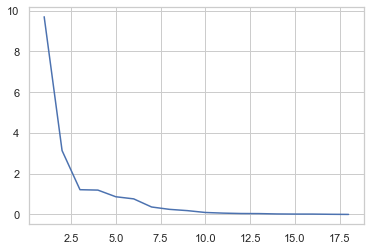

In [64]:
range_ = list(range(1,X_test_reduced.shape[1]+1))

plt.plot(range_, e_variance)

In [65]:
cum_var_exp = np.cumsum(e_variance_ratio)

e_variance_ratio, cum_var_exp

(array([5.38303436e-01, 1.73962011e-01, 6.74548683e-02, 6.63834844e-02,
        4.82739720e-02, 4.24884720e-02, 2.03753542e-02, 1.39307788e-02,
        1.04784428e-02, 5.43669711e-03, 3.67583051e-03, 2.61994599e-03,
        2.37638393e-03, 1.42958094e-03, 1.09179506e-03, 1.04685137e-03,
        5.02818476e-04, 1.69276921e-04]),
 array([0.53830344, 0.71226545, 0.77972032, 0.8461038 , 0.89437777,
        0.93686624, 0.9572416 , 0.97117238, 0.98165082, 0.98708752,
        0.99076335, 0.99338329, 0.99575968, 0.99718926, 0.99828105,
        0.9993279 , 0.99983072, 1.        ]))

In [67]:
# Repeating the above steps by removing the collinear columns
std_sh_drop_df = std_sh_df.drop(to_drop, axis=1)

print(std_sh_drop_df.shape)
std_sh_drop_df.head()

(846, 13)


compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.287723   
1    -0.325470    -0.624564              0.120112     -0.850348   
2     1.254193     0.843549              1.518571      1.241242   
3    -0.082445    -0.624564             -0.007021     -0.296691   
4    -1.054545    -0.135193             -0.769817      1.118208   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.858171                 0.867276      -0.208038   
1             -0.743740                 0.394826      -0.599893   
2              0.817407                 0.867276       1.148382   
3              0.297024                 0.394826      -0.750606   
4              2.378554                 1.812177      -0.599893   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                   0.402862                    -0.327938       -0.069503   
1                  -0.505940                    -0.059987        0.553405   
2                   1.311664                     0.073989        1.591584   
3                  -1.589512                    -1.265769       -0.069503   
4                   0.542677                     7.308682        0.553405   

   skewness_about.1  skewness_about.2  hollows_ratio  
0          0.380665         -0.312193       0.183957  
1          0.156589          0.013088       0.452977  
2         -0.403603         -0.149552       0.049447  
3         -0.291565          1.639494       1.529056  
4         -0.179527         -1.450677      -1.699181

In [68]:
pca_model = PCA(n_components=7)

X_test_reduced = pca_model.fit_transform(std_sh_drop_df)

In [69]:
pca_model.components_

array([[-0.3644968 , -0.35509087, -0.39761811, -0.3789213 , -0.17794715,
        -0.28536353, -0.37600539, -0.31267851,  0.12674439, -0.07591012,
        -0.08597503, -0.13111653, -0.20178174],
       [ 0.00905387,  0.26315654,  0.07344998, -0.07660372, -0.18516915,
         0.00350224,  0.18997577,  0.31931338,  0.47132001, -0.00706133,
        -0.08978324, -0.52109165, -0.49523931],
       [-0.17911316,  0.02933353, -0.1134411 ,  0.28719458,  0.67684475,
        -0.09995231, -0.06048452,  0.06469724,  0.20036716, -0.44164852,
        -0.39761861,  0.02580839, -0.04228433],
       [-0.06162001, -0.1089782 ,  0.12075656,  0.07199419, -0.0202163 ,
         0.05620169,  0.11641372, -0.16345508,  0.06738844, -0.64812633,
         0.69162023, -0.13210253, -0.01805036],
       [ 0.01664093, -0.1223434 , -0.07288016,  0.22542805,  0.38683058,
        -0.39088558,  0.02510308, -0.03546194,  0.29825521,  0.53859086,
         0.48061798,  0.03160729, -0.1152378 ],
       [-0.33242044, -0.031949

In [70]:
pca_model.explained_variance_

array([5.52573391, 2.88937055, 1.18206016, 1.11780263, 0.76907867,
       0.66988513, 0.33293493, 0.21024842, 0.14482216, 0.0552962 ,
       0.04860387, 0.03549035, 0.03405764])

In [71]:
pca_model.explained_variance_ratio_

array([0.42455402, 0.22199656, 0.09082022, 0.08588318, 0.05908997,
       0.05146872, 0.02558011, 0.01615384, 0.011127  , 0.00424853,
       0.00373434, 0.0027268 , 0.00261672])

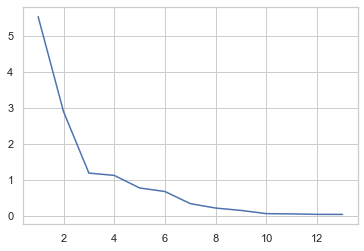

In [72]:
e_variance = pca_model.explained_variance_
range_ = list(range(1,std_sh_drop_df.shape[1]+1))

plt.plot(range_, e_variance)

In [73]:
e_variance_ratio = pca_model.explained_variance_ratio_
cum_var_exp = np.cumsum(e_variance_ratio)

e_variance_ratio, cum_var_exp

(array([0.42455402, 0.22199656, 0.09082022, 0.08588318, 0.05908997,
        0.05146872, 0.02558011, 0.01615384, 0.011127  , 0.00424853,
        0.00373434, 0.0027268 , 0.00261672]),
 array([0.42455402, 0.64655058, 0.7373708 , 0.82325399, 0.88234395,
        0.93381267, 0.95939278, 0.97554661, 0.98667361, 0.99092214,
        0.99465648, 0.99738328, 1.        ]))

In [75]:
corr_df = pd.DataFrame(pca_model.components_)

corr_df

0         1         2         3         4         5         6   \
0  -0.364497 -0.355091 -0.397618 -0.378921 -0.177947 -0.285364 -0.376005   
1   0.009054  0.263157  0.073450 -0.076604 -0.185169  0.003502  0.189976   
2  -0.179113  0.029334 -0.113441  0.287195  0.676845 -0.099952 -0.060485   
3  -0.061620 -0.108978  0.120757  0.071994 -0.020216  0.056202  0.116414   
4   0.016641 -0.122343 -0.072880  0.225428  0.386831 -0.390886  0.025103   
5  -0.332420 -0.031949 -0.033282 -0.045177  0.248885  0.761909 -0.282136   
6   0.520336 -0.319027  0.020857  0.169114 -0.081696  0.274153  0.069294   
7   0.045683  0.231183 -0.309027 -0.104197 -0.207366  0.039012 -0.183656   
8  -0.626354 -0.177194  0.455259  0.265394 -0.284293 -0.054760  0.231883   
9   0.229183 -0.522158  0.468290 -0.091694  0.037791 -0.099691 -0.440272   
10 -0.024889 -0.400560 -0.505245  0.554474 -0.267159  0.131031  0.118125   
11  0.031527 -0.026125 -0.111521 -0.007645 -0.003357 -0.217120  0.178762   
12 -0.033268 -0.394375 -0.111518 -0.533132  0.246226  0.134835  0.626927   

          7         8         9         10        11        12  
0  -0.312679  0.126744 -0.075910 -0.085975 -0.131117 -0.201782  
1   0.319313  0.471320 -0.007061 -0.089783 -0.521092 -0.495239  
2   0.064697  0.200367 -0.441649 -0.397619  0.025808 -0.042284  
3  -0.163455  0.067388 -0.648126  0.691620 -0.132103 -0.018050  
4  -0.035462  0.298255  0.538591  0.480618  0.031607 -0.115238  
5  -0.001948  0.105806  0.249431  0.148762 -0.238859  0.103340  
6  -0.515917  0.441692  0.002423 -0.217418  0.040861 -0.039907  
7   0.315998  0.557926 -0.118232  0.130597  0.445428  0.345376  
8  -0.076644  0.258934  0.087049 -0.153560  0.202285  0.126487  
9   0.470580  0.058340 -0.065339 -0.020045 -0.081479  0.075875  
10  0.361053 -0.174702 -0.008442  0.005561 -0.070137 -0.088431  
11 -0.044588  0.087921  0.028968 -0.079779 -0.593551  0.733141  
12  0.205947  0.043352  0.005383 -0.016733  0.173917 -0.000854

### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (7.5 points)

### SVM Approach 

In [85]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = C_df["class"]
features = C_df.drop(["class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size = 0.2, random_state = 10)

In [86]:
print(X_train.shape)
print(X_test.shape)

(676, 18)
(170, 18)


In [87]:
print(y_train.shape)
print(y_test.shape)

(676,)
(170,)


In [88]:
# use from sklearn.svm import SVC
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [89]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9733727810650887
0.9352941176470588


In [90]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[37  3  0]
 [ 4 82  0]
 [ 3  1 40]]


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit(features)

In [92]:
data_scaled= scaler.transform(features)

In [93]:
data_scaled

array([[0.47826087, 0.57692308, 0.59722222, ..., 0.3902439 , 0.36666667,
        0.53333333],
       [0.39130435, 0.30769231, 0.61111111, ..., 0.34146341, 0.43333333,
        0.6       ],
       [0.67391304, 0.65384615, 0.91666667, ..., 0.2195122 , 0.4       ,
        0.5       ],
       ...,
       [0.7173913 , 0.80769231, 0.84722222, ..., 0.09756098, 0.36666667,
        0.66666667],
       [0.2826087 , 0.11538462, 0.52777778, ..., 0.6097561 , 0.46666667,
        0.46666667],
       [0.26086957, 0.11538462, 0.36111111, ..., 0.43902439, 0.33333333,
        0.3       ]])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, stratify=target, test_size = 0.2, random_state = 10)

In [95]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [96]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8609467455621301
0.8058823529411765


In [97]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[29  3  5]
 [11 73  0]
 [ 4 10 35]]


In [98]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 1000, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [99]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9792899408284024
0.9352941176470588


In [100]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[39  3  1]
 [ 3 82  1]
 [ 2  1 38]]


Inreasing C allowed us to improve the model

In [101]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = [    {        
     'kernel': ['linear', 'rbf'],        
     'C': [ 0.01, 0.05, 0.5, 1 ]    } ]

In [103]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [104]:
gs.fit(X_train, y_train) # (This X_train is X_train_scaled;  y_train 

C:\Users\kgr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=2,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [105]:
# hyper parameters
gs.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [106]:
gs.best_score_ 

0.9112426035502958

### Cross Validation

In [107]:
# Building a Support Vector Machine with best hyper parameters
svc_model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
    
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [108]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9230769230769231
0.8941176470588236


In [109]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[38  5  3]
 [ 4 77  0]
 [ 2  4 37]]
